In [11]:
%matplotlib inline

In [12]:
import pandas
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [33]:
cooking_time_data = {'M': [5, 6, 10, 12, 15, 20, 25, 30],
                    't': [2, 2.5, 3.4, 3.5, 4.5, 5.4, 5.8, 7]}
cooking_time_df = pandas.DataFrame(cooking_time_data)
cooking_time_df['log(M)'] = np.log(cooking_time_df['M'])
cooking_time_df['log(t)'] = np.log(cooking_time_df['t'])
cooking_time_df['M1/3'] = cooking_time_df['M'] ** (1.0/3)
cooking_time_df['M2/3'] = cooking_time_df['M'] ** (2.0/3)
cooking_time_df

,M,t,log(M),log(t),M1/3,M2/3
0,5,2.0,1.609438,0.693147,1.709976,2.924018
1,6,2.5,1.791759,0.916291,1.817121,3.301927
2,10,3.4,2.302585,1.223775,2.154435,4.641589
3,12,3.5,2.484907,1.252763,2.289428,5.241483
4,15,4.5,2.708050,1.504077,2.466212,6.082202
5,20,5.4,2.995732,1.686399,2.714418,7.368063
6,25,5.8,3.218876,1.757858,2.924018,8.549880
7,30,7.0,3.401197,1.945910,3.107233,9.654894


In [37]:
y_log = cooking_time_df['log(t)']
X_log = cooking_time_df['log(M)']
X_log = sm.add_constant(X_log)

model_log = sm.OLS(y_log, X_log)
results_log = model_log.fit()
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(t)   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     507.1
Date:                Sat, 04 Feb 2017   Prob (F-statistic):           5.02e-07
Time:                        14:26:15   Log-Likelihood:                 13.714
No. Observations:                   8   AIC:                            -23.43
Df Residuals:                       6   BIC:                            -23.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3281      0.078     -4.228      0.006        -0.518    -0.138
log(M)         0.6632      0.029     22.519      0.000         0.591     0.735
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   2.698
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                0.947
Skew:                          -0.387   Prob(JB):                        0.623
Kurtosis:                       1.503   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

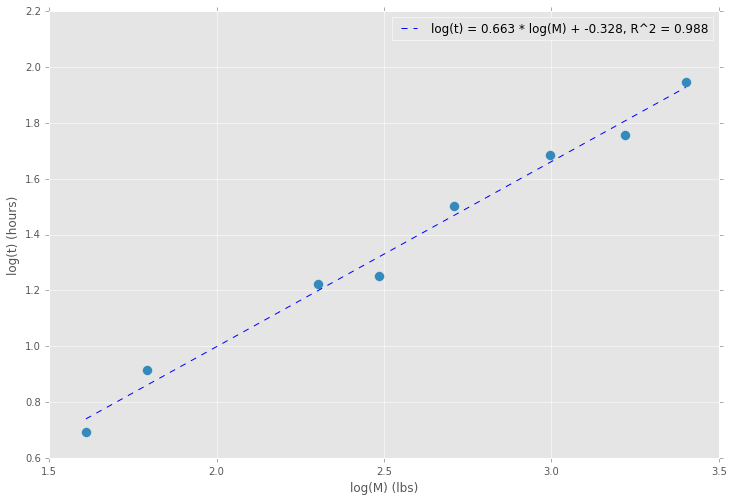

In [45]:
axes = cooking_time_df.plot.scatter(x='log(M)', y='log(t)', figsize=(12, 8), s=100)
axes.add_line(plt.Line2D(cooking_time_df['log(M)'], log_results.predict(X_log), ls='--', 
                         label='log(t) = {m:.3f} * log(M) + {c:.3f}, R^2 = {r2:.3f}'
            .format(m=results_log.params['log(M)'], c=results_log.params['const'], r2=results_log.rsquared)))

axes.set_xlabel('log(M) (lbs)')
axes.set_ylabel('log(t) (hours)')
axes.legend()

In [8]:
y = cooking_time_df['t']

X_1_3 = cooking_time_df['M1/3']
X_1_3 = sm.add_constant(X_1_3)

model_1_3 = sm.OLS(y, X_1_3)
results_1_3 = model_1_3.fit()
results_1_3.summary()

/Users/guydavidson/Virtualenvs/dev/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     321.7
Date:                Fri, 03 Feb 2017   Prob (F-statistic):           1.93e-06
Time:                        13:06:13   Log-Likelihood:                0.83554
No. Observations:                   8   AIC:                             2.329
Df Residuals:                       6   BIC:                             2.488
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.8821      0.463     -8.389      0.000        -5.014    -2.750
M1/3           3.3966      0.189     17.936      0.000         2.933     3.860
==============================================================================
Omnibus:                        0.430   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.356
Skew:                          -0.382   Prob(JB):                        0.837
Kurtosis:                       2.304   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X_2_3 = cooking_time_df['M2/3']
X_2_3 = sm.add_constant(X_2_3)

model_2_3 = sm.OLS(y, X_2_3)
results_2_3 = model_2_3.fit()
results_2_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     510.7
Date:                Fri, 03 Feb 2017   Prob (F-statistic):           4.91e-07
Time:                        13:06:49   Log-Likelihood:                 2.6572
No. Observations:                   8   AIC:                            -1.314
Df Residuals:                       6   BIC:                            -1.156
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0334      0.200      0.167      0.873        -0.456     0.523
M2/3           0.7083      0.031     22.599      0.000         0.632     0.785
==============================================================================
Omnibus:                        2.129   Durbin-Watson:                   2.866
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.164
Skew:                          -0.681   Prob(JB):                        0.559
Kurtosis:                       1.720   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

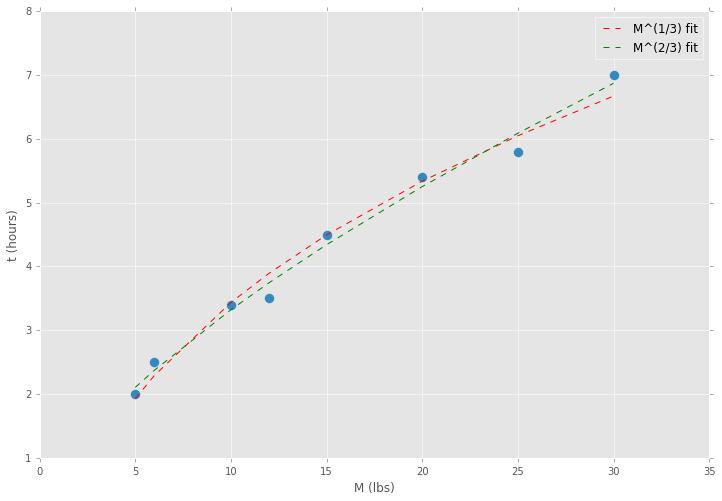

In [21]:
axes = cooking_time_df.plot.scatter(x='M', y='t', figsize=(12, 8), s=100)
axes.add_line(plt.Line2D(cooking_time_df['M'], results_1_3.predict(X_1_3), ls='--',
                        color='red', label='M^(1/3) fit'))
axes.add_line(plt.Line2D(cooking_time_df['M'], results_2_3.predict(X_2_3), ls='--',
                        color='green', label='M^(2/3) fit'))

axes.set_xlabel('M (lbs)')
axes.set_ylabel('t (hours)')
axes.legend()

In [32]:
tyson_weight_kg = 39.09
tyson_weight_lbs = tyson_weight_kg * 2.205
tyson_df = pandas.DataFrame({'M': [tyson_weight_lbs,]})

tyson_df = sm.add_constant(tyson_df)

print(results_1_3.predict(tyson_df))
print(results_2_3.predict(tyson_df))


[ 288.88277178]
[ 61.08707288]


In [25]:
tyson_with_constant

array([ 86.19345])

In [42]:
results_log.params['const']

-0.32806860095512363